# Task -2 CISCO challenge

## Imports

In [1]:
# Imports
import numpy as np # Support for large arrays and matrices, along with high-level mathematical functions.
import seaborn as sns # Graphing/Plotting module.
import pandas as pd # CSV handling with operations on tabular data.
import hashlib

from ast import literal_eval
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, StandardScaler

from collections import Counter
from utils import save_classification_report

In [2]:
# Preprocessing
def preprocess_header_fields(df, process_labels=True):
    column_names = ['num_dir_zero', 'num_dir_one', 
                    'payload_size_max', 'payload_size_min', 'payload_size_mean',
                   'delta_time_max', 'delta_time_min', 'delta_time_mean',
                   'tws_max', 'tws_min', 'tws_mean']
    my_df = pd.DataFrame(columns = column_names)
    df['udps.n_bytes_per_packet'] = df['udps.n_bytes_per_packet'].transform(literal_eval)
    for index, row in df.iterrows():
        phf = row['udps.protocol_header_fields']
        phf = literal_eval(phf)
        means = np.mean(phf, axis = 0)
        maxs = np.amax(phf, axis = 0) 
        mins = np.amin(phf, axis = 0)
        sums = np.sum(phf, axis = 0)
        new_row = {'num_dir_zero': 32-sums[0], 'num_dir_one': sums[0],
                   'payload_size_max': maxs[1], 'payload_size_min': mins[1], 'payload_size_mean': means[1],
                   'delta_time_max': maxs[2], 'delta_time_min': mins[2], 'delta_time_mean': means[2],
                   'tws_max': maxs[3], 'tws_min': mins[3], 'tws_mean': means[3]}
        my_df = my_df.append(new_row, ignore_index=True)
    return my_df
def preprocess_stnn_image(df, process_labels=True):
    column_names = [
        'first_iat_max', 'first_iat_min', 'first_iat_mean', 'first_iat_stddev', 'first_iat_skew', 'first_size_min', 'first_size_max', 
'first_size_mean', 'first_size_stddev', 'first_size_skew', 'first_num_packets', 'first_num_bytes', 'first_pkts_time', 'first_bytes_time',
        'second_iat_max', 'second_iat_min', 'second_iat_mean', 'second_iat_stddev', 'second_iat_skew', 'second_size_min', 'second_size_max', 
'second_size_mean', 'second_size_stddev', 'second_size_skew', 'second_num_packets', 'second_num_bytes', 'second_pkts_time', 'second_bytes_time',
        'third_iat_max', 'third_iat_min', 'third_iat_mean', 'third_iat_stddev', 'third_iat_skew', 'third_size_min', 'third_size_max', 
'third_size_mean', 'third_size_stddev', 'third_size_skew', 'third_num_packets', 'third_num_bytes', 'third_pkts_time', 'third_bytes_time',
        'fourth_iat_max', 'fourth_iat_min', 'fourth_iat_mean', 'fourth_iat_stddev', 'fourth_iat_skew', 'fourth_size_min', 'fourth_size_max', 
'fourth_size_mean', 'fourth_size_stddev', 'fourth_size_skew', 'fourth_num_packets', 'fourth_num_bytes', 'fourth_pkts_time', 'fourth_bytes_time',
        'fifth_iat_max', 'fifth_iat_min', 'fifth_iat_mean', 'fifth_iat_stddev', 'fifth_iat_skew', 'fifth_size_min', 'fifth_size_max', 
'fifth_size_mean', 'fifth_size_stddev', 'fifth_size_skew', 'fifth_num_packets', 'fifth_num_bytes', 'fifth_pkts_time', 'fifth_bytes_time'
    ]
    my_df = pd.DataFrame(columns = column_names)
    df['udps.stnn_image'] = df['udps.stnn_image'].transform(literal_eval)
    for index, row in df.iterrows():
        si = row['udps.stnn_image']
        new_row = {'first_iat_max': si[0][0], 'first_iat_min': si[0][1], 'first_iat_mean': si[0][2], 
            'first_iat_stddev': si[0][3], 'first_iat_skew': si[0][4], 'first_size_min': si[0][5], 
            'first_size_max': si[0][6], 'first_size_mean': si[0][7], 'first_size_stddev': si[0][8], 
            'first_size_skew': si[0][9], 'first_num_packets': si[0][10], 'first_num_bytes': si[0][11], 
            'first_pkts_time': si[0][12], 'first_bytes_time': si[0][13],
        'second_iat_max': si[1][0], 'second_iat_min': si[1][1], 'second_iat_mean': si[1][2], 
            'second_iat_stddev': si[1][3], 'second_iat_skew': si[1][4], 'second_size_min': si[1][5], 
            'second_size_max': si[1][6], 'second_size_mean': si[1][7], 'second_size_stddev': si[1][8], 
            'second_size_skew': si[1][9], 'second_num_packets': si[1][10], 'second_num_bytes': si[1][11], 
            'second_pkts_time': si[1][12], 'second_bytes_time': si[1][13],
        'third_iat_max': si[2][0], 'third_iat_min': si[2][1], 'third_iat_mean': si[2][2], 
            'third_iat_stddev': si[2][3], 'third_iat_skew': si[2][4], 'third_size_min': si[2][5], 
            'third_size_max': si[2][6], 'third_size_mean': si[2][7], 'third_size_stddev': si[2][8], 
            'third_size_skew': si[2][9], 'third_num_packets': si[2][10], 'third_num_bytes': si[2][11], 
            'third_pkts_time': si[2][12], 'third_bytes_time': si[2][13],
        'fourth_iat_max': si[3][0], 'fourth_iat_min': si[3][1], 'fourth_iat_mean': si[3][2],
            'fourth_iat_stddev': si[3][3], 'fourth_iat_skew': si[3][4], 'fourth_size_min': si[3][5],
            'fourth_size_max': si[3][6], 'fourth_size_mean': si[3][7], 'fourth_size_stddev': si[3][8], 
            'fourth_size_skew': si[3][9], 'fourth_num_packets': si[3][10], 'fourth_num_bytes': si[3][11],
            'fourth_pkts_time': si[3][12], 'fourth_bytes_time': si[3][13],
        'fifth_iat_max': si[4][0], 'fifth_iat_min': si[4][1], 'fifth_iat_mean': si[4][2], 
            'fifth_iat_stddev': si[4][3], 'fifth_iat_skew': si[4][4], 'fifth_size_min': si[4][5],
            'fifth_size_max': si[4][6], 'fifth_size_mean': si[4][7], 'fifth_size_stddev': si[4][8], 
            'fifth_size_skew': si[4][9], 'fifth_num_packets': si[4][10], 'fifth_num_bytes': si[4][11], 
            'fifth_pkts_time': si[4][12], 'fifth_bytes_time': si[4][13]}
        my_df = my_df.append(new_row, ignore_index=True)
    return my_df

# Post ML
def count_voles(votes):
    # count the votes for type
    vote_count=Counter(votes)
 
    # find the maximum number of votes
    max_votes = max(vote_count.values())
 
    # search for type having maximum votes and store in a list
    lst=[i for i in vote_count.keys() if vote_count[i]==max_votes]
 
    # sort the list
    return max_votes, sorted(lst)[0]

def final_predictions(dtc_p, rfc_p, xgb_p):
    final_result = []
    for idx, _ in enumerate(dtc_p):
        if dtc_p[idx] != rfc_p[idx] or dtc_p[idx] != xgb_p[idx] or rfc_p[idx] != xgb_p[idx]:
            max_votes, chosen = count_voles([dtc_p[idx], rfc_p[idx], xgb_p[idx]])
            if max_votes == 1:
                final_result.append(xgb_p[idx])
            else:
                final_result.append(chosen)
        else:
            final_result.append(dtc_p[idx])
    return final_result

## Read Data and Preprocess it to fit into DeepMAL model

In [3]:
# Read Data
dataset_type = 'mta' # other options: 'mta' , 'zero' or 'ustc'

filepath = f'./datasets/{dataset_type}/xy_train.csv'
df = pd.read_csv(filepath)

## Preprocess the data

In [4]:
label_type = 'label' # options: 'malware_family' or 'label'

features_list1 = [ 0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
                  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63 ]
features_list2 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
                  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63 ]
features_list3 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                  21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
                  41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63 ]

if dataset_type == 'zero':
    features_list1 = [ 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 20, 21, 22, 25, 26, 27, 28, 29, 
                      30, 31, 32, 33, 36, 37, 41, 42, 43, 44, 46, 47, 48, 49, 
                      51, 52, 53, 54, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68]
    features_list2 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
                      20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 
                      40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 
                      50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68 ]
    features_list3 = [ 0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 
                      20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 
                      40, 41, 42, 43, 44, 46, 47, 48, 49, 
                      51, 52, 53, 54, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68 ]
    
my_phf = preprocess_header_fields(df)
my_si= preprocess_stnn_image(df)
'''
NFLOW CORE FEATURES:                   expiration_id -> dst2src_bytes                    (0-26)
NFLOW LAYER-7 VISIBILITY FEATURES:     application_name -> content_type                  (27-34)
POST-MORTEM STATISTICAL FEATURES:      bidirectional_min_ps -> dst2src_fin_packets       (35-82)
UDPS:                                  udps.n_bytes -> udps.stnn_image                   (83-87)
'''
# 12 - bidirectional_first_seen_ms, 13 - bidirectional_last_seen_ms,
# 17 - src2dst_first_seen_ms, 18 - src2dst_last_seen_ms, 
# 22 - dst2src_first_seen_ms, 23 - dst2src_last_seen_ms,
# 27 - application_name, 28 - application_category_name,

X = np.stack([
    df['src_port'], df['dst_port'], df['protocol'], 
    df['ip_version'], df['bidirectional_duration_ms'], df['bidirectional_packets'], 
    df['bidirectional_bytes'], df['src2dst_duration_ms'], df['src2dst_packets'], 
    df['src2dst_bytes'], df['dst2src_duration_ms'], df['dst2src_packets'], 
    df['dst2src_bytes'], df['application_is_guessed'], df['bidirectional_min_ps'],
    df['bidirectional_mean_ps'], df['bidirectional_stddev_ps'], df['bidirectional_max_ps'],
    df['src2dst_min_ps'], df['src2dst_mean_ps'], df['src2dst_stddev_ps'],
    df['src2dst_max_ps'], df['dst2src_min_ps'], df['dst2src_mean_ps'], 
    df['dst2src_stddev_ps'], df['dst2src_max_ps'], df['bidirectional_min_piat_ms'], 
    df['bidirectional_mean_piat_ms'], df['bidirectional_stddev_piat_ms'], df['bidirectional_max_piat_ms'], 
    df['src2dst_min_piat_ms'], df['src2dst_mean_piat_ms'], df['src2dst_stddev_piat_ms'], 
    df['src2dst_max_piat_ms'], df['dst2src_min_piat_ms'], df['dst2src_mean_piat_ms'],
    df['dst2src_stddev_piat_ms'], df['dst2src_max_piat_ms'], df['bidirectional_syn_packets'], 
    df['bidirectional_ack_packets'], df['bidirectional_psh_packets'],  df['bidirectional_rst_packets'],
    df['bidirectional_fin_packets'], df['src2dst_syn_packets'], df['src2dst_ack_packets'], 
    df['src2dst_psh_packets'], df['src2dst_rst_packets'], df['src2dst_fin_packets'], 
    df['dst2src_syn_packets'], df['dst2src_ack_packets'], df['dst2src_psh_packets'], 
    df['dst2src_rst_packets'], df['dst2src_fin_packets'],
              
    df['udps.handshake_packets_duration'],
              
    my_phf['num_dir_zero'], my_phf['num_dir_one'], 
    my_phf['payload_size_max'], my_phf['payload_size_min'], my_phf['payload_size_mean'], 
    my_phf['delta_time_max'], my_phf['delta_time_mean'],
    my_phf['tws_max'], my_phf['tws_min'], my_phf['tws_mean']
]).T

if dataset_type == 'zero':
    X = np.stack([
        df['bidirectional_bytes'], df['src2dst_packets'], df['dst2src_packets'],
        
        df['udps.handshake_packets_duration'],
    
        my_phf['num_dir_zero'], my_phf['num_dir_one'], 
        my_phf['payload_size_max'], my_phf['payload_size_min'], my_phf['payload_size_mean'], 
        my_phf['delta_time_max'], my_phf['delta_time_mean'],
        my_phf['tws_max'], my_phf['tws_min'], my_phf['tws_mean'],
    
        my_si['first_iat_min'], my_si['first_iat_mean'], my_si['first_iat_stddev'], 
        my_si['first_iat_skew'], my_si['first_size_min'], my_si['first_size_max'], 
        my_si['first_size_mean'], my_si['first_size_stddev'], my_si['first_size_skew'], 
        my_si['first_num_packets'], my_si['first_num_bytes'],
    
        my_si['second_iat_min'], my_si['second_iat_mean'], my_si['second_iat_stddev'],
        my_si['second_iat_skew'], my_si['second_size_min'], my_si['second_size_max'],
        my_si['second_size_mean'], my_si['second_size_stddev'], my_si['second_size_skew'],
        my_si['second_num_packets'], my_si['second_num_bytes'], 
    
        my_si['third_iat_min'], my_si['third_iat_mean'], my_si['third_iat_stddev'], 
        my_si['third_iat_skew'], my_si['third_size_min'], my_si['third_size_max'], 
        my_si['third_size_mean'], my_si['third_size_stddev'], my_si['third_size_skew'], 
        my_si['third_num_packets'], my_si['third_num_bytes'],
    
        my_si['fourth_iat_min'], my_si['fourth_iat_mean'], my_si['fourth_iat_stddev'],
        my_si['fourth_iat_skew'], my_si['fourth_size_min'], my_si['fourth_size_max'],
        my_si['fourth_size_mean'], my_si['fourth_size_stddev'], my_si['fourth_size_skew'], 
        my_si['fourth_num_packets'], my_si['fourth_num_bytes'], 
    
        my_si['fifth_iat_min'], my_si['fifth_iat_mean'], my_si['fifth_iat_stddev'], 
        my_si['fifth_iat_skew'], my_si['fifth_size_min'], my_si['fifth_size_max'], 
        my_si['fifth_size_mean'], my_si['fifth_size_stddev'], my_si['fifth_size_skew'], 
        my_si['fifth_num_packets'], my_si['fifth_num_bytes']
    ]).T

y = np.stack(df[label_type])

enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)

scaler_mix = StandardScaler()
scaler_mix.fit(X)
X = scaler_mix.transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1666, stratify=y)

# MIX 1
X_mix_one_train = X_train[:, features_list1]
X_mix_one_test = X_test[:, features_list1]

# MIX 2
X_mix_two_train = X_train[:, features_list2]
X_mix_two_test = X_test[:, features_list2]

# MIX 3
X_mix_three_train = X_train[:, features_list3]
X_mix_three_test = X_test[:, features_list3]

## Train/Fit

In [6]:
# MIX 1
dtc_clf = DecisionTreeClassifier(max_depth=30, random_state=1914)
dtc_clf.fit(X_mix_one_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1914)

In [7]:
# MIX 2
rfc_clf = RandomForestClassifier(n_estimators=500, max_depth=30, n_jobs=4, random_state=2021)
rfc_clf.fit(X_mix_two_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=500, n_jobs=4,
                       random_state=2021)

In [8]:
# MIX 3
xgb_clf = XGBClassifier(n_estimators=500, max_depth=30, n_jobs=4, eval_metric='mlogloss', 
                        random_state=1941, use_label_encoder=False)
xgb_clf.fit(X_mix_three_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=30, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1941,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## Test/Predict

accuracy score: 99.68%


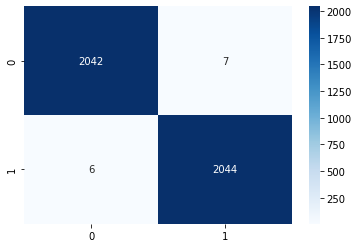

In [9]:
dtc_predictions = dtc_clf.predict(X_mix_one_test)
rfc_predictions = rfc_clf.predict(X_mix_two_test)
xgb_predictions = xgb_clf.predict(X_mix_three_test)
predictions = final_predictions(dtc_predictions, rfc_predictions, xgb_predictions)
    
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)

accuracy = accuracy_score(true_labels, predictions)
print("accuracy score: {0:.2f}%".format(accuracy*100))
    
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels))

## Save results in file

In [10]:
save_classification_report(
    classification_report(true_labels, predictions),
    cf_matrix,
    heatmap,
    'reports/'
)

In [11]:
print(dtc_clf.score(X_mix_one_test, y_test))
print(confusion_matrix(y_test,dtc_predictions))

0.9899975603805806
[[2026   23]
 [  18 2032]]


In [12]:
print(rfc_clf.score(X_mix_two_test, y_test))
print(confusion_matrix(y_test,rfc_predictions))

0.9963405708709442
[[2043    6]
 [   9 2041]]


In [13]:
print(xgb_clf.score(X_mix_three_test, y_test))
print(confusion_matrix(y_test,xgb_predictions))

0.9963405708709442
[[2043    6]
 [   9 2041]]


## Create predictions text file

In [14]:
'''
There are two types of submissions:
1. 'val': Validation set, a small sized test to check your results with - should be private.
2. 'test': Test set - a bigger test - this is the public submission.
'''
submission_type = 'val' # options: 'test' or 'val'

'''
Load the validation or test data into a DataFrame from the CSV, check that the path is correct.
'''
df_test = pd.read_csv(f'./datasets/{dataset_type}/x_{submission_type}.csv')

# preprocess data
my_df_test = preprocess_header_fields(df_test)
my_si= preprocess_stnn_image(df_test)

X_val = np.stack([
    df_test['src_port'], df_test['dst_port'], df_test['protocol'], 
    df_test['ip_version'], df_test['bidirectional_duration_ms'], df_test['bidirectional_packets'], 
    df_test['bidirectional_bytes'], df_test['src2dst_duration_ms'], df_test['src2dst_packets'], 
    df_test['src2dst_bytes'], df_test['dst2src_duration_ms'], df_test['dst2src_packets'], 
    df_test['dst2src_bytes'], df_test['application_is_guessed'], df_test['bidirectional_min_ps'],
    df_test['bidirectional_mean_ps'], df_test['bidirectional_stddev_ps'], df_test['bidirectional_max_ps'],
    df_test['src2dst_min_ps'], df_test['src2dst_mean_ps'], df_test['src2dst_stddev_ps'],
    df_test['src2dst_max_ps'], df_test['dst2src_min_ps'], df_test['dst2src_mean_ps'], 
    df_test['dst2src_stddev_ps'], df_test['dst2src_max_ps'], df_test['bidirectional_min_piat_ms'], 
    df_test['bidirectional_mean_piat_ms'], df_test['bidirectional_stddev_piat_ms'], df_test['bidirectional_max_piat_ms'], 
    df_test['src2dst_min_piat_ms'], df_test['src2dst_mean_piat_ms'], df_test['src2dst_stddev_piat_ms'], 
    df_test['src2dst_max_piat_ms'], df_test['dst2src_min_piat_ms'], df_test['dst2src_mean_piat_ms'], 
    df_test['dst2src_stddev_piat_ms'], df_test['dst2src_max_piat_ms'], df_test['bidirectional_syn_packets'], 
    df_test['bidirectional_ack_packets'], df_test['bidirectional_psh_packets'], df_test['bidirectional_rst_packets'], 
    df_test['bidirectional_fin_packets'], df_test['src2dst_syn_packets'], df_test['src2dst_ack_packets'], 
    df_test['src2dst_psh_packets'], df_test['src2dst_rst_packets'], df_test['src2dst_fin_packets'], 
    df_test['dst2src_syn_packets'], df_test['dst2src_ack_packets'], df_test['dst2src_psh_packets'], 
    df_test['dst2src_rst_packets'], df_test['dst2src_fin_packets'], 
              
    df_test['udps.handshake_packets_duration'],
    
    my_df_test['num_dir_zero'], my_df_test['num_dir_one'], 
    my_df_test['payload_size_max'], my_df_test['payload_size_min'], my_df_test['payload_size_mean'], 
    my_df_test['delta_time_max'], my_df_test['delta_time_mean'],
    my_df_test['tws_max'], my_df_test['tws_min'], my_df_test['tws_mean'],
]).T

if dataset_type == 'zero':
    X_val = np.stack([
        df_test['bidirectional_bytes'], df_test['src2dst_packets'], df_test['dst2src_packets'], 
        df_test['udps.handshake_packets_duration'],
    
        my_df_test['num_dir_zero'], my_df_test['num_dir_one'], 
        my_df_test['payload_size_max'], my_df_test['payload_size_min'], my_df_test['payload_size_mean'], 
        my_df_test['delta_time_max'], my_df_test['delta_time_mean'],
        my_df_test['tws_max'], my_df_test['tws_min'], my_df_test['tws_mean'],
    
        my_si['first_iat_min'], my_si['first_iat_mean'], my_si['first_iat_stddev'],
        my_si['first_iat_skew'], my_si['first_size_min'], my_si['first_size_max'], 
        my_si['first_size_mean'], my_si['first_size_stddev'], my_si['first_size_skew'], 
        my_si['first_num_packets'], my_si['first_num_bytes'], 
    
        my_si['second_iat_min'], my_si['second_iat_mean'], my_si['second_iat_stddev'], 
        my_si['second_iat_skew'], my_si['second_size_min'], my_si['second_size_max'], 
        my_si['second_size_mean'], my_si['second_size_stddev'], my_si['second_size_skew'], 
        my_si['second_num_packets'], my_si['second_num_bytes'], 
    
        my_si['third_iat_min'], my_si['third_iat_mean'], my_si['third_iat_stddev'], 
        my_si['third_iat_skew'], my_si['third_size_min'], my_si['third_size_max'], 
        my_si['third_size_mean'], my_si['third_size_stddev'], my_si['third_size_skew'], 
        my_si['third_num_packets'], my_si['third_num_bytes'], 
    
        my_si['fourth_iat_min'], my_si['fourth_iat_mean'], my_si['fourth_iat_stddev'], 
        my_si['fourth_iat_skew'], my_si['fourth_size_min'], my_si['fourth_size_max'], 
        my_si['fourth_size_mean'], my_si['fourth_size_stddev'], my_si['fourth_size_skew'], 
        my_si['fourth_num_packets'], my_si['fourth_num_bytes'], 
    
        my_si['fifth_iat_min'], my_si['fifth_iat_mean'], my_si['fifth_iat_stddev'], 
        my_si['fifth_iat_skew'],my_si['fifth_size_min'], my_si['fifth_size_max'], 
        my_si['fifth_size_mean'], my_si['fifth_size_stddev'], my_si['fifth_size_skew'], 
        my_si['fifth_num_packets'], my_si['fifth_num_bytes']
    ]).T

X_val = scaler_mix.transform(X_val)
# MIX 1
X_mix_one_val = X_val[:, features_list1]

# MIX 2
X_mix_two_val = X_val[:, features_list2]

# MIX 3
X_mix_three_val = X_val[:, features_list3]


dtc_predictions = dtc_clf.predict(X_mix_one_val)
rfc_predictions = rfc_clf.predict(X_mix_two_val)
xgb_predictions = xgb_clf.predict(X_mix_three_val)

predictions = final_predictions(dtc_predictions, rfc_predictions, xgb_predictions)
np.savetxt(f'{dataset_type}_{label_type}_{submission_type}_predictions.txt', predictions, fmt='%2d')